In [39]:
# Let's import our dependencies. 
import pandas as pd
import requests
import json
import numpy as np
import matplotlib.pyplot as plt

# Import the API key
from config_EN import geoapify_key  

In [4]:
print(geoapify_key)

c3b2764dfff24a979a0e86be3fd8a07b


In [5]:
# Read our CSV file into pandas dataframe. 

miami_df = pd.read_csv('miami-housing_2016.csv')
miami_df.head()

,LATITUDE,LONGITUDE,PARCELNO,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
0,25.891031,-80.160561,622280070620,440000.0,9375,1753,0,2815.9,12811.4,347.6,42815.3,37742.2,15954.9,67,0,8,4
1,25.891324,-80.153968,622280100460,349000.0,9375,1715,0,4359.1,10648.4,337.8,43504.9,37340.5,18125.0,63,0,9,4
2,25.891334,-80.153740,622280100470,800000.0,9375,2276,49206,4412.9,10574.1,297.1,43530.4,37328.7,18200.5,61,0,2,4
3,25.891765,-80.152657,622280100530,988000.0,12450,2058,10033,4585.0,10156.5,0.0,43797.5,37423.2,18514.4,63,0,9,4
4,25.891825,-80.154639,622280100200,755000.0,12800,1684,16681,4063.4,10836.8,326.6,43599.7,37550.8,17903.4,42,0,7,4


In [6]:
miami_df['LATITUDE_scale']= np.round(miami_df['LATITUDE'],3)
miami_df['LONGITUDE_scale']= np.round(miami_df['LONGITUDE'],3)

In [7]:
miami_df['LATITUDE_scale'] = miami_df['LATITUDE_scale'].map('{:.3f}'.format)
miami_df['LONGITUDE_scale'] = miami_df['LONGITUDE_scale'].map('{:.3f}'.format)

In [8]:
# Check the dataframe to ensure that there are no missing values. 
miami_df.head(10)
#miami_df.info()
#miami_df['LATITUDE_scale'].unique()
#miami_df['LONGITUDE_scale'].nunique()

,LATITUDE,LONGITUDE,PARCELNO,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality,LATITUDE_scale,LONGITUDE_scale
0,25.891031,-80.160561,622280070620,440000.0,9375,1753,0,2815.9,12811.4,347.6,42815.3,37742.2,15954.9,67,0,8,4,25.891,-80.161
1,25.891324,-80.153968,622280100460,349000.0,9375,1715,0,4359.1,10648.4,337.8,43504.9,37340.5,18125.0,63,0,9,4,25.891,-80.154
2,25.891334,-80.153740,622280100470,800000.0,9375,2276,49206,4412.9,10574.1,297.1,43530.4,37328.7,18200.5,61,0,2,4,25.891,-80.154
3,25.891765,-80.152657,622280100530,988000.0,12450,2058,10033,4585.0,10156.5,0.0,43797.5,37423.2,18514.4,63,0,9,4,25.892,-80.153
4,25.891825,-80.154639,622280100200,755000.0,12800,1684,16681,4063.4,10836.8,326.6,43599.7,37550.8,17903.4,42,0,7,4,25.892,-80.155
5,25.892060,-80.161354,622280070180,630000.0,9900,1531,2978,2391.4,13017.0,188.9,43135.1,38176.2,15687.2,41,0,2,4,25.892,-80.161
6,25.892473,-80.157217,622280080100,1020000.0,10387,1753,23116,3277.4,11667.8,0.0,43598.7,37973.9,17068.2,63,0,2,5,25.892,-80.157
7,25.893019,-80.157426,622280080400,850000.0,10272,1663,34933,3112.4,11718.1,10.5,43780.8,38198.3,16989.9,21,0,9,4,25.893,-80.157
8,25.893046,-80.161556,622280080020,250000.0,9375,1493,11668,2081.8,13043.8,51.5,43481.7,38542.0,15623.3,56,0,3,4,25.893,-80.162
9,25.893050,-80.158048,622280080370,1220000.0,13803,3077,34580,2937.7,11917.7,9.7,43730.1,38235.2,16787.0,63,0,11,5,25.893,-80.158


In [9]:
miami_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13932 entries, 0 to 13931
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LATITUDE           13932 non-null  float64
 1   LONGITUDE          13932 non-null  float64
 2   PARCELNO           13932 non-null  int64  
 3   SALE_PRC           13932 non-null  float64
 4   LND_SQFOOT         13932 non-null  int64  
 5   TOT_LVG_AREA       13932 non-null  int64  
 6   SPEC_FEAT_VAL      13932 non-null  int64  
 7   RAIL_DIST          13932 non-null  float64
 8   OCEAN_DIST         13932 non-null  float64
 9   WATER_DIST         13932 non-null  float64
 10  CNTR_DIST          13932 non-null  float64
 11  SUBCNTR_DI         13932 non-null  float64
 12  HWY_DIST           13932 non-null  float64
 13  age                13932 non-null  int64  
 14  avno60plus         13932 non-null  int64  
 15  month_sold         13932 non-null  int64  
 16  structure_quality  139

In [10]:
sample_miami_df = miami_df.sample(n=100,random_state=1)
sample_miami_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 12782 to 3432
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LATITUDE           100 non-null    float64
 1   LONGITUDE          100 non-null    float64
 2   PARCELNO           100 non-null    int64  
 3   SALE_PRC           100 non-null    float64
 4   LND_SQFOOT         100 non-null    int64  
 5   TOT_LVG_AREA       100 non-null    int64  
 6   SPEC_FEAT_VAL      100 non-null    int64  
 7   RAIL_DIST          100 non-null    float64
 8   OCEAN_DIST         100 non-null    float64
 9   WATER_DIST         100 non-null    float64
 10  CNTR_DIST          100 non-null    float64
 11  SUBCNTR_DI         100 non-null    float64
 12  HWY_DIST           100 non-null    float64
 13  age                100 non-null    int64  
 14  avno60plus         100 non-null    int64  
 15  month_sold         100 non-null    int64  
 16  structure_quality  10

In [ ]:
# keeping the sample ^^ at n=100 so I don't max out my API calls today. We should up the sample to n=1000 when we run for real. 

In [11]:
# Find the number of schools in a 1,000m radius of each house. 
# Also, find the zip code for the first school in each record. We will use this zip code as a proxy for the zip code of the home.

check_lat_lon =[]
lat_list = []
long_list =[]
school_count =[]
zip_list =[]

for index,row in sample_miami_df.iterrows():
    lat_lon = row["LATITUDE_scale"]+row["LONGITUDE_scale"]
    if lat_lon not in check_lat_lon:
        check_lat_lon.append(lat_lon)
        categories = "education.school"
        radius = 1000
        filters = f'circle:{row["LONGITUDE_scale"]},{row["LATITUDE_scale"]},{radius}'
        bias = f'proximity:{row["LONGITUDE_scale"]},{row["LATITUDE_scale"]}'
        limit = 100

        # set up a parameters dictionary
        params = {
            "categories":categories,
            "bias":bias,
            "apiKey":geoapify_key,    
            "limit":limit,
            "filter":filters,
            "bias":bias,
        }
        base_url = "https://api.geoapify.com/v2/places"

        # run a request using our params dictionary
        response = requests.get(base_url, params=params)   
        # print the response url, avoid doing for public github repos in order to avoid exposing key
        print(response.url)   
        lat_list.append(row["LATITUDE_scale"])
        long_list.append(row["LONGITUDE_scale"])
        places_data = response.json()
        school_count.append(len(places_data["features"]))
        try:
            zip_list.append(places_data["features"][0]["properties"]["postcode"])
        except:
            print("No schools in this area")
            zip_list.append(0)

https://api.geoapify.com/v2/places?categories=education.school&bias=proximity%3A-80.455%2C25.665&apiKey=c3b2764dfff24a979a0e86be3fd8a07b&limit=100&filter=circle%3A-80.455%2C25.665%2C1000
https://api.geoapify.com/v2/places?categories=education.school&bias=proximity%3A-80.175%2C25.851&apiKey=c3b2764dfff24a979a0e86be3fd8a07b&limit=100&filter=circle%3A-80.175%2C25.851%2C1000
https://api.geoapify.com/v2/places?categories=education.school&bias=proximity%3A-80.387%2C25.540&apiKey=c3b2764dfff24a979a0e86be3fd8a07b&limit=100&filter=circle%3A-80.387%2C25.540%2C1000
No schools in this area
https://api.geoapify.com/v2/places?categories=education.school&bias=proximity%3A-80.381%2C25.821&apiKey=c3b2764dfff24a979a0e86be3fd8a07b&limit=100&filter=circle%3A-80.381%2C25.821%2C1000
https://api.geoapify.com/v2/places?categories=education.school&bias=proximity%3A-80.171%2C25.916&apiKey=c3b2764dfff24a979a0e86be3fd8a07b&limit=100&filter=circle%3A-80.171%2C25.916%2C1000
https://api.geoapify.com/v2/places?catego

https://api.geoapify.com/v2/places?categories=education.school&bias=proximity%3A-80.204%2C25.875&apiKey=c3b2764dfff24a979a0e86be3fd8a07b&limit=100&filter=circle%3A-80.204%2C25.875%2C1000
https://api.geoapify.com/v2/places?categories=education.school&bias=proximity%3A-80.275%2C25.839&apiKey=c3b2764dfff24a979a0e86be3fd8a07b&limit=100&filter=circle%3A-80.275%2C25.839%2C1000
https://api.geoapify.com/v2/places?categories=education.school&bias=proximity%3A-80.402%2C25.559&apiKey=c3b2764dfff24a979a0e86be3fd8a07b&limit=100&filter=circle%3A-80.402%2C25.559%2C1000
https://api.geoapify.com/v2/places?categories=education.school&bias=proximity%3A-80.357%2C25.842&apiKey=c3b2764dfff24a979a0e86be3fd8a07b&limit=100&filter=circle%3A-80.357%2C25.842%2C1000
No schools in this area
https://api.geoapify.com/v2/places?categories=education.school&bias=proximity%3A-80.426%2C25.466&apiKey=c3b2764dfff24a979a0e86be3fd8a07b&limit=100&filter=circle%3A-80.426%2C25.466%2C1000
https://api.geoapify.com/v2/places?catego

https://api.geoapify.com/v2/places?categories=education.school&bias=proximity%3A-80.276%2C25.672&apiKey=c3b2764dfff24a979a0e86be3fd8a07b&limit=100&filter=circle%3A-80.276%2C25.672%2C1000
No schools in this area
https://api.geoapify.com/v2/places?categories=education.school&bias=proximity%3A-80.257%2C25.744&apiKey=c3b2764dfff24a979a0e86be3fd8a07b&limit=100&filter=circle%3A-80.257%2C25.744%2C1000
https://api.geoapify.com/v2/places?categories=education.school&bias=proximity%3A-80.333%2C25.729&apiKey=c3b2764dfff24a979a0e86be3fd8a07b&limit=100&filter=circle%3A-80.333%2C25.729%2C1000
https://api.geoapify.com/v2/places?categories=education.school&bias=proximity%3A-80.199%2C25.877&apiKey=c3b2764dfff24a979a0e86be3fd8a07b&limit=100&filter=circle%3A-80.199%2C25.877%2C1000
https://api.geoapify.com/v2/places?categories=education.school&bias=proximity%3A-80.274%2C25.847&apiKey=c3b2764dfff24a979a0e86be3fd8a07b&limit=100&filter=circle%3A-80.274%2C25.847%2C1000
https://api.geoapify.com/v2/places?catego

In [20]:
schools_count_df = pd.DataFrame( {
    "LATITUDE_scale": lat_list,
    "LONGITUDE_scale": long_list,
    "school count" : school_count,
    "postcodes" : zip_list
    })

schools_count_df

,LATITUDE_scale,LONGITUDE_scale,school count,postcodes
0,25.665,-80.455,2,33196
1,25.851,-80.175,6,33138
2,25.540,-80.387,0,0
3,25.821,-80.381,2,33178
4,25.916,-80.171,7,33162
...,...,...,...,...
95,25.714,-80.258,3,33133
96,25.641,-80.377,1,33176
97,25.766,-80.263,7,33134
98,25.621,-80.321,4,33157


In [ ]:
# NOTE: Eventually, we need to figure out how to get the zip codes for records that didn't have a school in the radius. 

In [15]:
# Now we're looking for the number of hospitals within 1,000m of each house. 

check_lat_lon = []
lat_list = []
long_list = []
hosp_count = []
hosp_zip_list = []

for index,row in sample_miami_df.iterrows():
    lat_lon = row["LATITUDE_scale"]+row["LONGITUDE_scale"]
    if lat_lon not in check_lat_lon:
        check_lat_lon.append(lat_lon)
        categories = "healthcare.hospital"
        radius = 1000
        filters = f'circle:{row["LONGITUDE_scale"]},{row["LATITUDE_scale"]},{radius}'
        bias = f'proximity:{row["LONGITUDE_scale"]},{row["LATITUDE_scale"]}'
        limit = 100

        # set up a parameters dictionary
        params = {
            "categories":categories,
            "bias":bias,
            "apiKey":geoapify_key,    
            "limit":limit,
            "filter":filters,
            "bias":bias,
        }
        base_url = "https://api.geoapify.com/v2/places"

        # run a request using our params dictionary
        response = requests.get(base_url, params=params)   
        # print the response url, avoid doing for public github repos in order to avoid exposing key
        print(response.url)   
        lat_list.append(row["LATITUDE_scale"])
        long_list.append(row["LONGITUDE_scale"])
        places_data = response.json()
        hosp_count.append(len(places_data["features"]))
        try:
            hosp_zip_list.append(places_data["features"][0]["properties"]["postcode"])
        except:
            print("No hospitals in this area")
            hosp_zip_list.append(0)

https://api.geoapify.com/v2/places?categories=healthcare.hospital&bias=proximity%3A-80.455%2C25.665&apiKey=c3b2764dfff24a979a0e86be3fd8a07b&limit=100&filter=circle%3A-80.455%2C25.665%2C1000
No hospitals in this area
https://api.geoapify.com/v2/places?categories=healthcare.hospital&bias=proximity%3A-80.175%2C25.851&apiKey=c3b2764dfff24a979a0e86be3fd8a07b&limit=100&filter=circle%3A-80.175%2C25.851%2C1000
No hospitals in this area
https://api.geoapify.com/v2/places?categories=healthcare.hospital&bias=proximity%3A-80.387%2C25.540&apiKey=c3b2764dfff24a979a0e86be3fd8a07b&limit=100&filter=circle%3A-80.387%2C25.540%2C1000
No hospitals in this area
https://api.geoapify.com/v2/places?categories=healthcare.hospital&bias=proximity%3A-80.381%2C25.821&apiKey=c3b2764dfff24a979a0e86be3fd8a07b&limit=100&filter=circle%3A-80.381%2C25.821%2C1000
No hospitals in this area
https://api.geoapify.com/v2/places?categories=healthcare.hospital&bias=proximity%3A-80.171%2C25.916&apiKey=c3b2764dfff24a979a0e86be3fd8a

https://api.geoapify.com/v2/places?categories=healthcare.hospital&bias=proximity%3A-80.387%2C25.573&apiKey=c3b2764dfff24a979a0e86be3fd8a07b&limit=100&filter=circle%3A-80.387%2C25.573%2C1000
No hospitals in this area
https://api.geoapify.com/v2/places?categories=healthcare.hospital&bias=proximity%3A-80.206%2C25.759&apiKey=c3b2764dfff24a979a0e86be3fd8a07b&limit=100&filter=circle%3A-80.206%2C25.759%2C1000
No hospitals in this area
https://api.geoapify.com/v2/places?categories=healthcare.hospital&bias=proximity%3A-80.405%2C25.508&apiKey=c3b2764dfff24a979a0e86be3fd8a07b&limit=100&filter=circle%3A-80.405%2C25.508%2C1000
No hospitals in this area
https://api.geoapify.com/v2/places?categories=healthcare.hospital&bias=proximity%3A-80.444%2C25.606&apiKey=c3b2764dfff24a979a0e86be3fd8a07b&limit=100&filter=circle%3A-80.444%2C25.606%2C1000
No hospitals in this area
https://api.geoapify.com/v2/places?categories=healthcare.hospital&bias=proximity%3A-80.259%2C25.722&apiKey=c3b2764dfff24a979a0e86be3fd8a

https://api.geoapify.com/v2/places?categories=healthcare.hospital&bias=proximity%3A-80.371%2C25.557&apiKey=c3b2764dfff24a979a0e86be3fd8a07b&limit=100&filter=circle%3A-80.371%2C25.557%2C1000
No hospitals in this area
https://api.geoapify.com/v2/places?categories=healthcare.hospital&bias=proximity%3A-80.321%2C25.653&apiKey=c3b2764dfff24a979a0e86be3fd8a07b&limit=100&filter=circle%3A-80.321%2C25.653%2C1000
No hospitals in this area
https://api.geoapify.com/v2/places?categories=healthcare.hospital&bias=proximity%3A-80.444%2C25.605&apiKey=c3b2764dfff24a979a0e86be3fd8a07b&limit=100&filter=circle%3A-80.444%2C25.605%2C1000
No hospitals in this area
https://api.geoapify.com/v2/places?categories=healthcare.hospital&bias=proximity%3A-80.273%2C25.955&apiKey=c3b2764dfff24a979a0e86be3fd8a07b&limit=100&filter=circle%3A-80.273%2C25.955%2C1000
No hospitals in this area
https://api.geoapify.com/v2/places?categories=healthcare.hospital&bias=proximity%3A-80.262%2C25.831&apiKey=c3b2764dfff24a979a0e86be3fd8a

In [16]:
hosp_count_df = pd.DataFrame( {
    "LATITUDE_scale": lat_list,
    "LONGITUDE_scale": long_list,
    "hosp count" : hosp_count,
    "postcodes" : hosp_zip_list
    })

hosp_count_df

,LATITUDE_scale,LONGITUDE_scale,hosp count,postcodes
0,25.665,-80.455,0,0
1,25.851,-80.175,0,0
2,25.540,-80.387,0,0
3,25.821,-80.381,0,0
4,25.916,-80.171,0,0
...,...,...,...,...
95,25.714,-80.258,0,0
96,25.641,-80.377,0,0
97,25.766,-80.263,0,0
98,25.621,-80.321,0,0


In [19]:
# Now we're looking for the number of restaurants within 1,000m of each house. 
# First, we test one URL to get the structure of the JSON return. 

# longi = -80.381
# lati = 25.821

# categories = "catering.restaurant"
# radius = 10000
# filters = f'circle:{longi},{lati},{radius}'
# bias = f'proximity:{longi},{lati}'
# limit = 100

# params = {
#             "categories":categories,
#             "bias":bias,
#             "apiKey":geoapify_key,    
#             "limit":limit,
#             "filter":filters,
#             "bias":bias,
#         }

# base_url = "https://api.geoapify.com/v2/places"

# response_rest = requests.get(base_url, params=params) 

# rest_data = response_rest.json()
                    
# print(response_rest.url)

https://api.geoapify.com/v2/places?categories=catering.restaurant&bias=proximity%3A-80.381%2C25.821&apiKey=8197c8d7f0e44683b0fa23eb2e7c1a63&limit=100&filter=circle%3A-80.381%2C25.821%2C10000


In [17]:
# Now we can do our for loop to get all the restaurants within 1,000m of each house. 

check_lat_lon =[]
lat_list = []
long_list =[]
rest_count =[]
rest_zip_list =[]

for index,row in sample_miami_df.iterrows():
    lat_lon = row["LATITUDE_scale"]+row["LONGITUDE_scale"]
    if lat_lon not in check_lat_lon:
        check_lat_lon.append(lat_lon)
        categories = "catering.restaurant"
        radius = 1000
        filters = f'circle:{row["LONGITUDE_scale"]},{row["LATITUDE_scale"]},{radius}'
        bias = f'proximity:{row["LONGITUDE_scale"]},{row["LATITUDE_scale"]}'
        limit = 100

        # set up a parameters dictionary
        params = {
            "categories":categories,
            "bias":bias,
            "apiKey":geoapify_key,    
            "limit":limit,
            "filter":filters,
            "bias":bias,
        }
        base_url = "https://api.geoapify.com/v2/places"

        # run a request using our params dictionary
        response = requests.get(base_url, params=params)   
        # print the response url, avoid doing for public github repos in order to avoid exposing key
        print(response.url)   
        lat_list.append(row["LATITUDE_scale"])
        long_list.append(row["LONGITUDE_scale"])
        places_data = response.json()
        rest_count.append(len(places_data["features"]))
        try:
            rest_zip_list.append(places_data["features"][0]["properties"]["postcode"])
        except:
            print("No restaurants in this area")
            rest_zip_list.append(0)

https://api.geoapify.com/v2/places?categories=catering.restaurant&bias=proximity%3A-80.455%2C25.665&apiKey=c3b2764dfff24a979a0e86be3fd8a07b&limit=100&filter=circle%3A-80.455%2C25.665%2C1000
No restaurants in this area
https://api.geoapify.com/v2/places?categories=catering.restaurant&bias=proximity%3A-80.175%2C25.851&apiKey=c3b2764dfff24a979a0e86be3fd8a07b&limit=100&filter=circle%3A-80.175%2C25.851%2C1000
https://api.geoapify.com/v2/places?categories=catering.restaurant&bias=proximity%3A-80.387%2C25.540&apiKey=c3b2764dfff24a979a0e86be3fd8a07b&limit=100&filter=circle%3A-80.387%2C25.540%2C1000
No restaurants in this area
https://api.geoapify.com/v2/places?categories=catering.restaurant&bias=proximity%3A-80.381%2C25.821&apiKey=c3b2764dfff24a979a0e86be3fd8a07b&limit=100&filter=circle%3A-80.381%2C25.821%2C1000
No restaurants in this area
https://api.geoapify.com/v2/places?categories=catering.restaurant&bias=proximity%3A-80.171%2C25.916&apiKey=c3b2764dfff24a979a0e86be3fd8a07b&limit=100&filter

https://api.geoapify.com/v2/places?categories=catering.restaurant&bias=proximity%3A-80.206%2C25.759&apiKey=c3b2764dfff24a979a0e86be3fd8a07b&limit=100&filter=circle%3A-80.206%2C25.759%2C1000
https://api.geoapify.com/v2/places?categories=catering.restaurant&bias=proximity%3A-80.405%2C25.508&apiKey=c3b2764dfff24a979a0e86be3fd8a07b&limit=100&filter=circle%3A-80.405%2C25.508%2C1000
No restaurants in this area
https://api.geoapify.com/v2/places?categories=catering.restaurant&bias=proximity%3A-80.444%2C25.606&apiKey=c3b2764dfff24a979a0e86be3fd8a07b&limit=100&filter=circle%3A-80.444%2C25.606%2C1000
No restaurants in this area
https://api.geoapify.com/v2/places?categories=catering.restaurant&bias=proximity%3A-80.259%2C25.722&apiKey=c3b2764dfff24a979a0e86be3fd8a07b&limit=100&filter=circle%3A-80.259%2C25.722%2C1000
https://api.geoapify.com/v2/places?categories=catering.restaurant&bias=proximity%3A-80.204%2C25.875&apiKey=c3b2764dfff24a979a0e86be3fd8a07b&limit=100&filter=circle%3A-80.204%2C25.875%2

https://api.geoapify.com/v2/places?categories=catering.restaurant&bias=proximity%3A-80.273%2C25.955&apiKey=c3b2764dfff24a979a0e86be3fd8a07b&limit=100&filter=circle%3A-80.273%2C25.955%2C1000
No restaurants in this area
https://api.geoapify.com/v2/places?categories=catering.restaurant&bias=proximity%3A-80.262%2C25.831&apiKey=c3b2764dfff24a979a0e86be3fd8a07b&limit=100&filter=circle%3A-80.262%2C25.831%2C1000
No restaurants in this area
https://api.geoapify.com/v2/places?categories=catering.restaurant&bias=proximity%3A-80.356%2C25.605&apiKey=c3b2764dfff24a979a0e86be3fd8a07b&limit=100&filter=circle%3A-80.356%2C25.605%2C1000
https://api.geoapify.com/v2/places?categories=catering.restaurant&bias=proximity%3A-80.422%2C25.620&apiKey=c3b2764dfff24a979a0e86be3fd8a07b&limit=100&filter=circle%3A-80.422%2C25.620%2C1000
https://api.geoapify.com/v2/places?categories=catering.restaurant&bias=proximity%3A-80.305%2C25.826&apiKey=c3b2764dfff24a979a0e86be3fd8a07b&limit=100&filter=circle%3A-80.305%2C25.826%2

In [18]:
rest_count_df = pd.DataFrame( {
    "LATITUDE_scale": lat_list,
    "LONGITUDE_scale": long_list,
    "rest count" : rest_count,
    "postcodes" : rest_zip_list
    })

rest_count_df

,LATITUDE_scale,LONGITUDE_scale,rest count,postcodes
0,25.665,-80.455,0,0
1,25.851,-80.175,10,33138
2,25.540,-80.387,0,0
3,25.821,-80.381,0,0
4,25.916,-80.171,0,0
...,...,...,...,...
95,25.714,-80.258,0,0
96,25.641,-80.377,0,0
97,25.766,-80.263,8,33134
98,25.621,-80.321,0,0


In [21]:
# Merging dataframes: original dataset, school df, hospital df and restaurant df
# Original df: miami_df
# School df: schools_count_df
# Hospital df: hosp_count_df
# Restaurant df: rest_count_df


# first merge school and hospital df
merge_school_hosp_df = pd.merge(schools_count_df, hosp_count_df, on=["LATITUDE_scale","LONGITUDE_scale"])
merge_school_hosp_df.head(10)

,LATITUDE_scale,LONGITUDE_scale,school count,postcodes_x,hosp count,postcodes_y
0,25.665,-80.455,2,33196,0,0
1,25.851,-80.175,6,33138,0,0
2,25.540,-80.387,0,0,0,0
3,25.821,-80.381,2,33178,0,0
4,25.916,-80.171,7,33162,0,0
5,25.595,-80.391,2,33177,0,0
6,25.719,-80.259,10,33133,0,0
7,25.593,-80.405,1,33177,0,0
8,25.631,-80.423,1,33186,0,0
9,25.567,-80.335,2,33189,1,33189


In [29]:
merge_school_hosp_df.rename(columns = {"postcodes_x":"postcodes_school","postcodes_y":"postcodes_hosp"},inplace=True)
merge_school_hosp_df.head(10)

,LATITUDE_scale,LONGITUDE_scale,school count,postcodes_school,hosp count,postcodes_hosp
0,25.665,-80.455,2,33196,0,0
1,25.851,-80.175,6,33138,0,0
2,25.540,-80.387,0,0,0,0
3,25.821,-80.381,2,33178,0,0
4,25.916,-80.171,7,33162,0,0
5,25.595,-80.391,2,33177,0,0
6,25.719,-80.259,10,33133,0,0
7,25.593,-80.405,1,33177,0,0
8,25.631,-80.423,1,33186,0,0
9,25.567,-80.335,2,33189,1,33189


In [30]:
# now merge school, hospital and restaurent

merge_school_hosp_rest_df = pd.merge(merge_school_hosp_df, rest_count_df, on=["LATITUDE_scale","LONGITUDE_scale"])
merge_school_hosp_rest_df.head(10)

,LATITUDE_scale,LONGITUDE_scale,school count,postcodes_school,hosp count,postcodes_hosp,rest count,postcodes
0,25.665,-80.455,2,33196,0,0,0,0
1,25.851,-80.175,6,33138,0,0,10,33138
2,25.540,-80.387,0,0,0,0,0,0
3,25.821,-80.381,2,33178,0,0,0,0
4,25.916,-80.171,7,33162,0,0,0,0
5,25.595,-80.391,2,33177,0,0,0,0
6,25.719,-80.259,10,33133,0,0,3,33146
7,25.593,-80.405,1,33177,0,0,0,0
8,25.631,-80.423,1,33186,0,0,1,33177
9,25.567,-80.335,2,33189,1,33189,0,0


In [31]:
merge_school_hosp_rest_df.rename(columns = {"postcodes":"postcodes_rest"},inplace=True)
merge_school_hosp_rest_df.head(10)

,LATITUDE_scale,LONGITUDE_scale,school count,postcodes_school,hosp count,postcodes_hosp,rest count,postcodes_rest
0,25.665,-80.455,2,33196,0,0,0,0
1,25.851,-80.175,6,33138,0,0,10,33138
2,25.540,-80.387,0,0,0,0,0,0
3,25.821,-80.381,2,33178,0,0,0,0
4,25.916,-80.171,7,33162,0,0,0,0
5,25.595,-80.391,2,33177,0,0,0,0
6,25.719,-80.259,10,33133,0,0,3,33146
7,25.593,-80.405,1,33177,0,0,0,0
8,25.631,-80.423,1,33186,0,0,1,33177
9,25.567,-80.335,2,33189,1,33189,0,0


In [32]:
# merge school, hospital and restaurant df with original df

merge_all_df = pd.merge(merge_school_hosp_rest_df, miami_df, on=["LATITUDE_scale","LONGITUDE_scale"])
merge_all_df.head(10)

,LATITUDE_scale,LONGITUDE_scale,school count,postcodes_school,hosp count,postcodes_hosp,rest count,postcodes_rest,LATITUDE,LONGITUDE,...,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
0,25.665,-80.455,2,33196,0,0,0,0,25.664650,-80.454970,...,7864.9,52246.5,41626.8,95417.8,47379.1,22018.5,22,0,3,4
1,25.851,-80.175,6,33138,0,0,10,33138,25.851443,-80.175251,...,4070.8,18512.6,326.1,27723.2,26516.6,10578.8,21,0,8,4
2,25.540,-80.387,0,0,0,0,0,0,25.539853,-80.386774,...,11110.2,18526.1,10559.4,107067.5,59032.3,3600.5,17,0,6,4
3,25.821,-80.381,2,33178,0,0,0,0,25.821264,-80.380662,...,8771.4,57951.2,20335.1,63908.4,47818.3,1899.8,19,0,4,5
4,25.916,-80.171,7,33162,0,0,0,0,25.916466,-80.171423,...,3212.8,16424.2,2745.2,51242.3,47633.0,10676.0,21,0,12,4
5,25.595,-80.391,2,33177,0,0,0,0,25.594855,-80.391073,...,8270.3,27070.5,10389.4,92871.6,42503.6,5072.5,25,0,11,2
6,25.719,-80.259,10,33133,0,0,3,33146,25.718857,-80.258514,...,2911.5,3560.9,2547.3,30150.9,11119.7,18984.7,1,0,1,3
7,25.719,-80.259,10,33133,0,0,3,33146,25.719335,-80.258962,...,2661.8,3781.9,2340.7,30113.1,10960.6,18986.8,51,0,3,5
8,25.593,-80.405,1,33177,0,0,0,0,25.592818,-80.404990,...,8026.7,31656.4,12812.5,96626.4,45930.9,9582.5,9,0,9,2
9,25.631,-80.423,1,33186,0,0,1,33177,25.630770,-80.422574,...,872.2,38455.2,25724.5,92386.8,41578.8,12399.5,30,0,5,4


In [34]:
schools_count_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   LATITUDE_scale   100 non-null    object
 1   LONGITUDE_scale  100 non-null    object
 2   school count     100 non-null    int64 
 3   postcodes        100 non-null    object
dtypes: int64(1), object(3)
memory usage: 3.2+ KB


In [35]:
hosp_count_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   LATITUDE_scale   100 non-null    object
 1   LONGITUDE_scale  100 non-null    object
 2   hosp count       100 non-null    int64 
 3   postcodes        100 non-null    object
dtypes: int64(1), object(3)
memory usage: 3.2+ KB


In [36]:
rest_count_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   LATITUDE_scale   100 non-null    object
 1   LONGITUDE_scale  100 non-null    object
 2   rest count       100 non-null    int64 
 3   postcodes        100 non-null    object
dtypes: int64(1), object(3)
memory usage: 3.2+ KB


In [37]:
miami_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13932 entries, 0 to 13931
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LATITUDE           13932 non-null  float64
 1   LONGITUDE          13932 non-null  float64
 2   PARCELNO           13932 non-null  int64  
 3   SALE_PRC           13932 non-null  float64
 4   LND_SQFOOT         13932 non-null  int64  
 5   TOT_LVG_AREA       13932 non-null  int64  
 6   SPEC_FEAT_VAL      13932 non-null  int64  
 7   RAIL_DIST          13932 non-null  float64
 8   OCEAN_DIST         13932 non-null  float64
 9   WATER_DIST         13932 non-null  float64
 10  CNTR_DIST          13932 non-null  float64
 11  SUBCNTR_DI         13932 non-null  float64
 12  HWY_DIST           13932 non-null  float64
 13  age                13932 non-null  int64  
 14  avno60plus         13932 non-null  int64  
 15  month_sold         13932 non-null  int64  
 16  structure_quality  139

In [42]:
# why does merge_all_df has 191 rows??? df for school, hospital and restaurants all have 100 rows only.
merge_all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191 entries, 0 to 190
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LATITUDE_scale     191 non-null    object 
 1   LONGITUDE_scale    191 non-null    object 
 2   school count       191 non-null    int64  
 3   postcodes_school   191 non-null    object 
 4   hosp count         191 non-null    int64  
 5   postcodes_hosp     191 non-null    object 
 6   rest count         191 non-null    int64  
 7   postcodes_rest     191 non-null    object 
 8   LATITUDE           191 non-null    float64
 9   LONGITUDE          191 non-null    float64
 10  PARCELNO           191 non-null    int64  
 11  SALE_PRC           191 non-null    float64
 12  LND_SQFOOT         191 non-null    int64  
 13  TOT_LVG_AREA       191 non-null    int64  
 14  SPEC_FEAT_VAL      191 non-null    int64  
 15  RAIL_DIST          191 non-null    float64
 16  OCEAN_DIST         191 non

KeyError: 'school count '

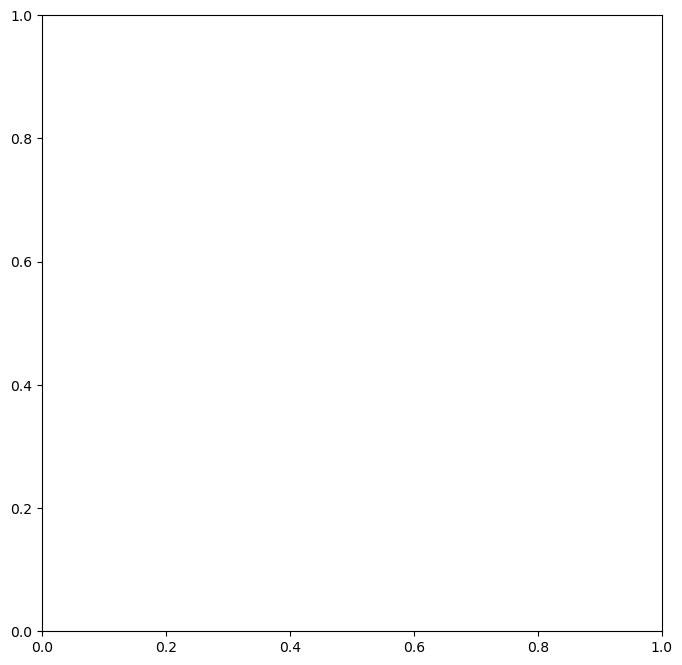

In [45]:
# trying to plot sales price vs. number of schools with a scattered plot

merge_all_df.plot(kind="scatter", x="school count ", y="SALE_PRC", grid=True, figsize=(8,8),
              title="Sale Price Vs. Number of Schools")
plt.show()

In [ ]:
schools_count_df.head(30)
print(schools_count_df['postcodes'].value_counts())

In [ ]:
schools_count_df.head()

In [ ]:
# Determine if there are any duplicate parcel numbers. 

miami_df["PARCELNO"].nunique()

# We see there are duplicate parcel numbers, but it seems that this is because the same property was sold twice (or more) in the same year.

In [ ]:
miami_df.columns

In [ ]:
school_merged_df = pd.merge(miami_df, schools_count_df, on = ['LATITUDE_scale','LONGITUDE_scale'])
school_merged_df
school_merged_df.sort_values(by=["count"],ascending=False)

In [ ]:
# convert response to json
#places_data = response.json()

# Print the json (pretty printed)
#print(json.dumps(places_data, indent=4, sort_keys=True))

In [ ]:
# convert response to json
#places_data = response.json()

# Print the json (pretty printed)
#print(json.dumps(places_data, indent=4, sort_keys=True))